In [32]:
import numpy as np
from sklearn import datasets
import pandas as pd

In [33]:
boston = datasets.load_boston(return_X_y=False)

In [34]:
df = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])

In [35]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [36]:
df['Target'] = boston['target']

In [37]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [38]:
df = df.values
m=len(df)
print('Number of training examples: {}'.format(m))
X = df[:, 0:13]
print('Shape of X: {}'.format(X.shape))
y = df[:,-1].reshape(m,1)
print('Shape of y: {}'.format(y.shape))

Number of training examples: 506
Shape of X: (506, 13)
Shape of y: (506, 1)


In [39]:
def featureNormalize(X):
    mu=np.mean(X, axis=0)
    sigma = np.std(X, axis = 0)
    X = (X-mu)/sigma
    return X, mu, sigma

In [40]:
X, mu, sigma = featureNormalize(X)

In [41]:
mu

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01])

In [42]:
X[0]

array([-0.41978194,  0.28482986, -1.2879095 , -0.27259857, -0.14421743,
        0.41367189, -0.12001342,  0.1402136 , -0.98284286, -0.66660821,
       -1.45900038,  0.44105193, -1.0755623 ])

In [43]:
def addOnes(X):
    X = pd.DataFrame(X, columns=boston['feature_names'])
    X['X0'] = 1
    columns = X.columns.tolist()
    columns = columns[-1:] + columns[:-1]
    X = X[columns]
    X = X.values
    return X

In [44]:
X = addOnes(X)

In [45]:
X[0]

array([ 1.        , -0.41978194,  0.28482986, -1.2879095 , -0.27259857,
       -0.14421743,  0.41367189, -0.12001342,  0.1402136 , -0.98284286,
       -0.66660821, -1.45900038,  0.44105193, -1.0755623 ])

In [46]:
y.shape

(506, 1)

In [47]:
def CostF(X, y, theta):
    m = len(X)
    errors = np.dot(X, theta)-y
    J = 1/(2*m) * np.sum(np.square(errors))
    return J

In [48]:
def GradientD(X, y, theta, alpha, iters):
    m=len(X)
    J_history = np.zeros((iters,1))
    for i in range(iters):
        h = np.dot(X, theta)
        errors = h - y
        delta = (alpha/m)*np.dot(X.T, errors)
        theta = theta - delta
        
        J_history[i] = CostF(X, y, theta)
    return theta, J_history


alpha = 0.01
iters = 500
theta = np.zeros((X.shape[1],1))
theta, J_history = GradientD(X, y, theta, alpha, iters)


In [49]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cost J')

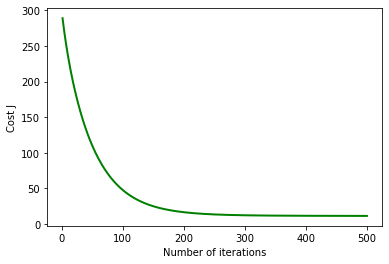

In [50]:
x_iter = np.arange(1, iters+1)

fig, ax = plt.subplots()
ax.plot(x_iter, J_history, '-g', lw = 2)
ax.set_xlabel('Number of iterations')
ax.set_ylabel('Cost J')